# 系统聚类：
**分为凝聚和分裂两种，凝聚就是由小的分类簇迭代成大的，而分裂则是大的簇分为小的簇**

In [2]:
#利用PCA进行系统聚类

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import cm
import matplotlib as mpl
from sklearn import cluster,datasets
from sklearn.decomposition import PCA
plt.rcParams['axes.unicode_minus']=False

In [5]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=iris.target
pca=PCA(n_components=3)
newiris=pca.fit_transform(iris.data)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print("方差贡献率:",pca.explained_variance_ratio_)
print("累计方差贡献率:",np.sum(pca.explained_variance_ratio_))

方差贡献率: [0.92461872 0.05306648 0.01710261]
累计方差贡献率: 0.9947878161267247


In [8]:
hicl=cluster.AgglomerativeClustering(n_clusters=3,affinity='euclidean',connectivity=None,linkage='ward')
hicl_pre=hicl.fit_predict(newiris)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


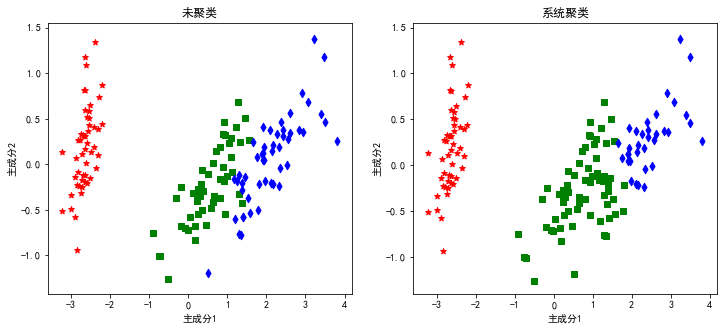

In [13]:
newiris[iris.target==0,0]
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax1.scatter(newiris[iris.target==0,0],newiris[iris.target==0,1],c='r',alpha=1,marker="*")
ax1.scatter(newiris[iris.target==1,0],newiris[iris.target==1,1],c='g',alpha=1,marker="s")
ax1.scatter(newiris[iris.target==2,0],newiris[iris.target==2,1],c='b',alpha=1,marker="d")
ax1.set_xlabel("主成分1")
ax1.set_ylabel("主成分2")
ax1.set_title("未聚类")

ax2=fig.add_subplot(122)
ax2.scatter(newiris[hicl_pre==0,0],newiris[hicl_pre==0,1],c="g",alpha=1,marker="s")
ax2.scatter(newiris[hicl_pre==1,0],newiris[hicl_pre==1,1],c="r",alpha=1,marker="*")
ax2.scatter(newiris[hicl_pre==2,0],newiris[hicl_pre==2,1],c="b",alpha=1,marker="d")
ax2.set_xlabel("主成分1")
ax2.set_ylabel("主成分2")
ax2.set_title("系统聚类")
plt.subplots_adjust(wspace=0.2)
plt.show()

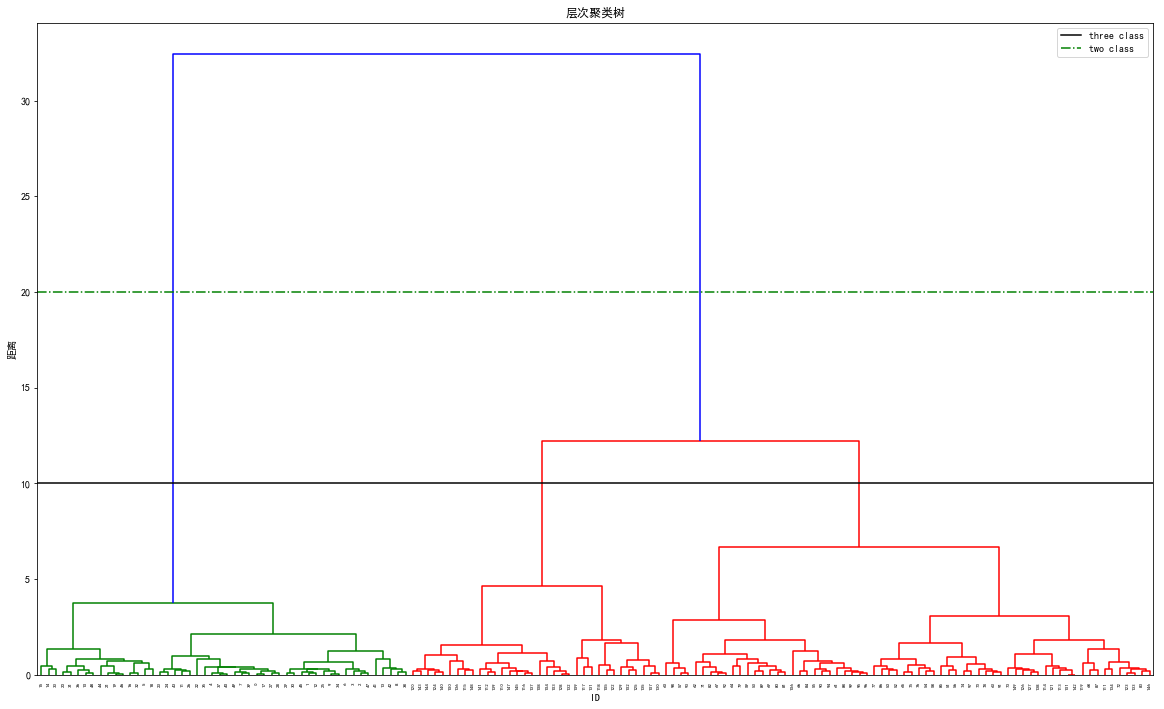

In [22]:
#系统聚类树
from scipy.cluster.hierarchy import dendrogram,linkage
z=linkage(newiris,method='ward',metric='euclidean')
fig=plt.figure(figsize=(20,12))
irisdn=dendrogram(z)
plt.axhline(y=10,color='k',linestyle='solid',label='three class')
plt.axhline(y=20,color='g',linestyle='dashdot',label='two class')
plt.title("层次聚类树")
plt.xlabel("ID")
plt.ylabel("距离")
plt.legend(loc=1)
plt.show()

# KMeans聚类：
**把n个点划分到k个簇中，使得每个点都属于离它最近的均值对应的簇**

In [19]:
wine=datasets.load_wine(return_X_y=True)
wineX=wine[0]
pca=PCA(n_components=5)
newwine=pca.fit_transform(wineX)
print("累计方差贡献率:",np.sum(pca.explained_variance_ratio_))

累计方差贡献率: 0.9999846861150248


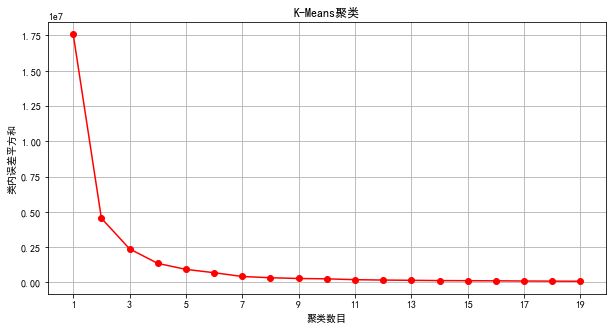

In [20]:
k=np.arange(1,20)
error=[]
for i in k:
    kmeans=cluster.KMeans(n_clusters=i,random_state=1)
    kmeans.fit(newwine)
    error.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(k,error,"r-o")
plt.xlabel("聚类数目")
plt.ylabel("类内误差平方和")
plt.title("K-Means聚类")
plt.xticks(np.arange(1,20,2))
plt.grid()
plt.show()

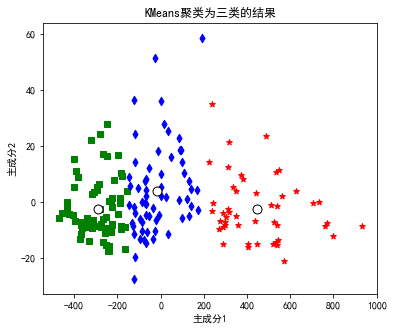

In [21]:
#由上图可知分为三类效果最好，所以把k=3
kmean=cluster.KMeans(n_clusters=3,random_state=1)
k_pre=kmean.fit_predict(newwine)
fig=plt.figure(figsize=(6,5))
ax1=fig.add_subplot(111)
ax1.scatter(newwine[k_pre==0,0],newwine[k_pre==0,1],c='r',alpha=1,marker="*")
ax1.scatter(newwine[k_pre==1,0],newwine[k_pre==1,1],c='g',alpha=1,marker="s")
ax1.scatter(newwine[k_pre==2,0],newwine[k_pre==2,1],c='b',alpha=1,marker="d")

ax1.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='white',marker='o',s=80,edgecolor='k')
ax1.set_xlabel("主成分1")
ax1.set_ylabel("主成分2")
ax1.set_title("KMeans聚类为三类的结果")
plt.show()

# 密度聚类：
**聚类结构依据样本分布密度的紧密程度而确定**

# Mean Shift聚类：
一般是指先算出当前点的偏移均值，然后以此为新的起始点，继续移动，直到满足一定的结束条件。

**主要是一种无参密度估计的算法，Mean Shift是一个向量，它的方向是指向当前点上概率密度梯度的方向**